# Aula 03 - Resoluções de Python


## Exercício 4: Evolução das Aplicações Financeiras 

Considerando as taxas abaixo, o cálculo das rentabilidades e os investimentos de cada cliente, faça um gráfico que mostre o aumento dos montantes investidos ao longo de 10 anos. 

Para isso, importe a bilioteca necessária:

```python
    # Biblioteca básica para uso de gráficos em Python
    import matplotlib.pyplot as plt
    %matplotlib inline
```

In [2]:
 # Biblioteca básica para uso de gráficos em Python
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def calcula_rentabilidade(C, j, t=1):
    return C*(1+j)**t

In [4]:
taxas = {
    "CDB": 0.01,
    "ações": 1.0,
    "LCI": 0.02,
    "FII": 0.09,
    "LCA": 0.03
}

investidor1 = {
    "nome": "João",
    "capital": 10000,
    "investimentos": {
        "CDB": 0.35,
        "ações": 0.12,
        "LCI": 0.20,
        "LCA": 0.33
    }
}

investidor2 = {
    "nome": "Maria",
    "capital": 8000,
    "investimentos": {
        "CDB": 0.10,
        "ações": 0.70,
        "FII": 0.20
    }
}

investidor3 = {
    "nome": "Mario",
    "capital": 2500,
    "investimentos": {
        "CDB": 0.30,
        "ações": 0.40,
        "FII": 0.20,
        "LCA": 0.10
    }
}

investidores = [investidor1, investidor2, investidor3]

In [5]:
# Apenas uma observação de como pegar a porcentagem de investimento em ações do 1º investidor
investidores[0]["investimentos"]["ações"]

0.12

In [6]:
investidores[1]["nome"]

'Maria'

In [6]:
def calcula_rendimentos(investidores, taxas, tempo):
  # Dicionário de montantes
  montantes = {}

  # Para cada investidor
  for investidor in investidores: 
      montantes[investidor["nome"]] = investidor["capital"]         # O montante começa com o capital inicial
           
      # Para cada investimento deste investidor 
      for investimento, pct in investidor["investimentos"].items(): # Obtem o tipo de investimento e o % investido
          capital_aplicado = investidor["capital"] * pct            # Calcule o capital aplicado naquele investimento
          rendimento = calcula_rentabilidade(capital_aplicado,      # Obtem a rendimento daquele investimento
                                            taxas[investimento],
                                            tempo)
          # Atualiza o montante com o rendimento deste investimento 
          montantes[investidor["nome"]] += rendimento # montantes[investidor["nome"]] = montantes[investidor["nome"]] + rendimento

  return montantes

In [7]:
# Obtendo do usuário quantos anos de investimento quer simular
tempo = int(input("Para quantos anos você quer ver o gráfico? "))
tempo

Para quantos anos você quer ver o gráfico? 5


5

In [8]:
# Cálculo dos rendimentos por ano 
rendimentos = []                                             # Lista para salvar os rendimentos
for t in range(tempo+1):                                     # Vamos iterar para cada ano de 0 até "tempo"
    rendimento = calcula_rendimentos(investidores, taxas, t) # Para cada ano, calcula o rendimento dos investidores
    print("Tempo {0}: {1}".format(t, rendimento))            # Imprime o resultado
    rendimentos.append(rendimento)                           # Adiciona os investimentos daquele ano na lista de rendimentos

Tempo 0: {'João': 20000.0, 'Maria': 16000.0, 'Mario': 5000.0}
Tempo 1: {'João': 21374.0, 'Maria': 21752.0, 'Mario': 6060.0}
Tempo 2: {'João': 23952.12, 'Maria': 33117.04, 'Mario': 8124.35}
Tempo 3: {'João': 28934.468600000004, 'Maria': 55696.2872, 'Mario': 12193.421999999999}
Tempo 4: {'João': 38721.157428, 'Maria': 100691.01378400001, 'Mario': 20267.621015}
Tempo 5: {'João': 58112.30122694, 'Maria': 190502.60636792, 'Mario': 36347.3880336}


In [9]:
# Mostrando o resultado da lista "rendimentos". Note que ela é uma lista de dicionários 
rendimentos

[{'João': 20000.0, 'Maria': 16000.0, 'Mario': 5000.0},
 {'João': 21374.0, 'Maria': 21752.0, 'Mario': 6060.0},
 {'João': 23952.12, 'Maria': 33117.04, 'Mario': 8124.35},
 {'João': 28934.468600000004,
  'Maria': 55696.2872,
  'Mario': 12193.421999999999},
 {'João': 38721.157428, 'Maria': 100691.01378400001, 'Mario': 20267.621015},
 {'João': 58112.30122694, 'Maria': 190502.60636792, 'Mario': 36347.3880336}]

In [10]:
# ATENÇÃO! CONCEITO NOVO! =D

# Criando uma list comprehension de python para obter os montantes de rendimento do João
# A leitura é: 
#    - python, crie uma lista (observe os [ ])
#    - itere para cada rendimento da lista "rendimentos"
#    - pegue o rendimento do investidor "João", ou seja, acesse o valor armazenado no dicionário com a chave "João"
joao = [rendimento["João"] for rendimento in rendimentos]
joao

[20000.0, 21374.0, 23952.12, 28934.468600000004, 38721.157428, 58112.30122694]

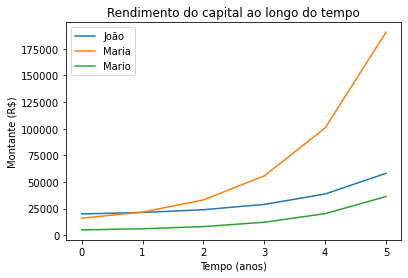

In [11]:
# Agora que sabemos fazer list comprehension, vamos criar o gráfico 

# Para cada investidor da lista de investidores 
for investidor in investidores:
    lista_montantes = [rendimento[investidor["nome"]] for rendimento in rendimentos] # Pegue a lista de montantes por ano
    plt.plot(range(tempo+1), lista_montantes, label=investidor["nome"])              # Plote a curva, usando o nome como label

# Ajustes no gráfico (título, eixos X e Y, mostrar legenda)
plt.title("Rendimento do capital ao longo do tempo")
plt.xlabel("Tempo (anos)")
plt.ylabel("Montante (R$)")
plt.legend()
plt.show()

## Exercício 5: Gráficos dos montantes por investimento

Analise o código acima e altere a lógica para gerar um gráfico para cada investidor (João, Maria, Mário), sendo que cada gráfico deve mostrar a evolução temporal dos investimentos da carteira daquele investidor. **Por exemplo**: fazer um gráfico para a Maria, no qual mostre 3 curvas, uma para cada investimento da carteira dela: CDB, ações e FII. 

_DICA_ : explore o código acima! Faça impressões das partes separadas, investigue como fazer os acessos aos tipos de dados utilizados: Listas e Dicionários. Para obter exemplos sobre o uso de tais estruturas, consulte [este link](https://www.devmedia.com.br/colecoes-no-python-listas-tuplas-e-dicionarios/40678).

Bom trabalho!